In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

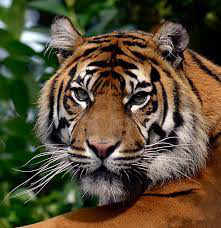

In [72]:
imgData = image.load_img('image/tiger/tiger1.jpg')
imgData

In [73]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

In [74]:
dataGen = image.ImageDataGenerator(rescale=1./255)

In [75]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 40 images belonging to 2 classes.


In [76]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [77]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

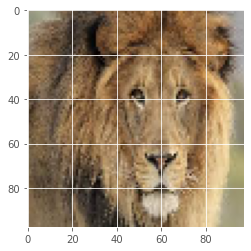

In [78]:
plt.imshow(x_train[0])

In [79]:
# 분류값 확인
trainGen.class_indices

{'lion': 0, 'tiger': 1}

In [80]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 218ms/step - loss: 0.7082 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 1.1496 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 6.0827 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 1.0883 - acc: 0.6500
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 1.2304 - acc: 0.6500
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2712 - acc: 0.8500
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.7957 - acc: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5904 - acc: 0.8000
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1581 - acc: 0.9000
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2473 - acc: 0.9500
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3878 - acc: 0.

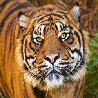

In [81]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [82]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr/255   #  스케일링

array([[[0.6509804 , 0.40392157, 0.20392157],
        [0.6745098 , 0.41568628, 0.22745098],
        [0.69803923, 0.43137255, 0.28627452],
        ...,
        [0.4627451 , 0.29803923, 0.14117648],
        [0.5019608 , 0.3372549 , 0.14117648],
        [0.53333336, 0.37254903, 0.16078432]],

       [[0.68235296, 0.45490196, 0.27450982],
        [0.6666667 , 0.43529412, 0.27058825],
        [0.62352943, 0.4       , 0.28235295],
        ...,
        [0.47058824, 0.32156864, 0.16862746],
        [0.45490196, 0.30588236, 0.11372549],
        [0.4392157 , 0.28235295, 0.08235294]],

       [[0.65882355, 0.45490196, 0.3019608 ],
        [0.59607846, 0.4       , 0.27058825],
        [0.4745098 , 0.30980393, 0.22352941],
        ...,
        [0.44705883, 0.30588236, 0.16470589],
        [0.43137255, 0.28627452, 0.10980392],
        [0.43137255, 0.2901961 , 0.09411765]],

       ...,

       [[0.40392157, 0.2784314 , 0.12941177],
        [0.47058824, 0.3764706 , 0.23529412],
        [0.2627451 , 0

In [83]:
imgArr.shape

(98, 98, 3)

In [84]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

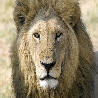

In [85]:
testImg2 = image.load_img('image/test2.jpg',target_size=(98,98))
testImg2

In [86]:
imgArr2 = image.img_to_array(testImg2) #  넘파이 배열로 만듦
imgArr2/255   #  스케일링

array([[[0.8745098 , 0.81960785, 0.68235296],
        [0.8901961 , 0.8392157 , 0.7137255 ],
        [0.8862745 , 0.84313726, 0.7176471 ],
        ...,
        [0.8901961 , 0.827451  , 0.69803923],
        [0.92156863, 0.8784314 , 0.76862746],
        [0.91764706, 0.8627451 , 0.7490196 ]],

       [[0.8509804 , 0.79607844, 0.6509804 ],
        [0.8509804 , 0.8       , 0.6666667 ],
        [0.85490197, 0.8156863 , 0.6784314 ],
        ...,
        [0.9019608 , 0.8392157 , 0.70980394],
        [0.92156863, 0.8784314 , 0.76862746],
        [0.92941177, 0.8745098 , 0.7607843 ]],

       [[0.83137256, 0.78431374, 0.63529414],
        [0.84313726, 0.8039216 , 0.6666667 ],
        [0.85882354, 0.8235294 , 0.69411767],
        ...,
        [0.90588236, 0.84313726, 0.7137255 ],
        [0.92156863, 0.8627451 , 0.7490196 ],
        [0.9254902 , 0.8666667 , 0.74509805]],

       ...,

       [[0.8117647 , 0.7764706 , 0.64705884],
        [0.8352941 , 0.78431374, 0.6509804 ],
        [0.7921569 , 0

In [87]:
imgArr2.shape

(98, 98, 3)

In [88]:
model.predict(imgArr2.reshape(1,98,98,3)).argmax(axis=1)

array([0], dtype=int64)